In [2]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *
from hossam.timeserise import *
import warnings
warnings.filterwarnings(action='ignore')
import warnings
warnings.filterwarnings(action='ignore')
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [4]:
categories = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
origin = my_read_excel('C:/Users/J/Desktop/Data_Science/Class/E.추론통계/E.InferentialStatistics/수업자료/telecom_customer.xlsx',categories=categories)
my_pretty_table(origin.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [5]:
df = origin.drop(origin.query('TotalCharges == " "').index)


In [6]:
blank_df = df.query('TotalCharges == " "')
blank_df    

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [10]:
categories = ['Churn','gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
df2 = my_labelling(df,categories).set_index('customerID')
my_pretty_table(df2.head())

AttributeError: 'DataFrame' object has no attribute 'unique'

In [ ]:
df2['TotalCharges'] = df2['TotalCharges'].astype('float')

In [ ]:
origin['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = my_train_test_split(df2, yname='Churn',scalling=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5625, 19), (5625,), (1407, 19), (1407,))

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.803556 |
| 10 |     1 | l2        |          0.803378 |
| 13 |    10 | l2        |          0.803378 |
| 16 |   100 | l2        |          0.803378 |
|  4 |  0.01 | l2        |          0.799644 |
|  1 | 0.001 | l2        |          0.772444 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.271766 |     0.305629 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.804978 |     0.808813 | 예측 결과(TN,FP,TP,TN)가 실제 결과

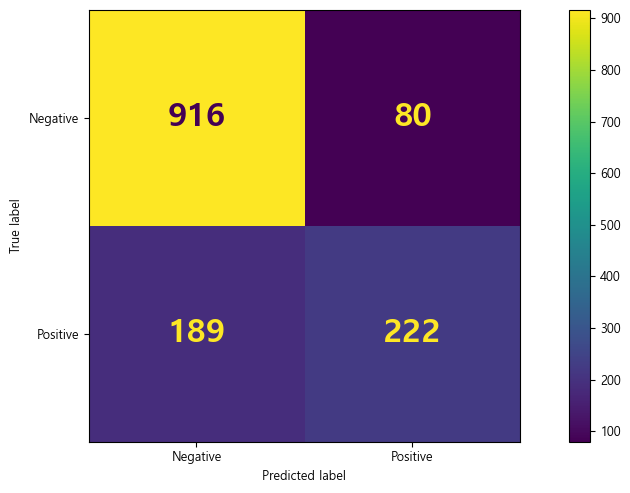


[ROC/PR Curve]


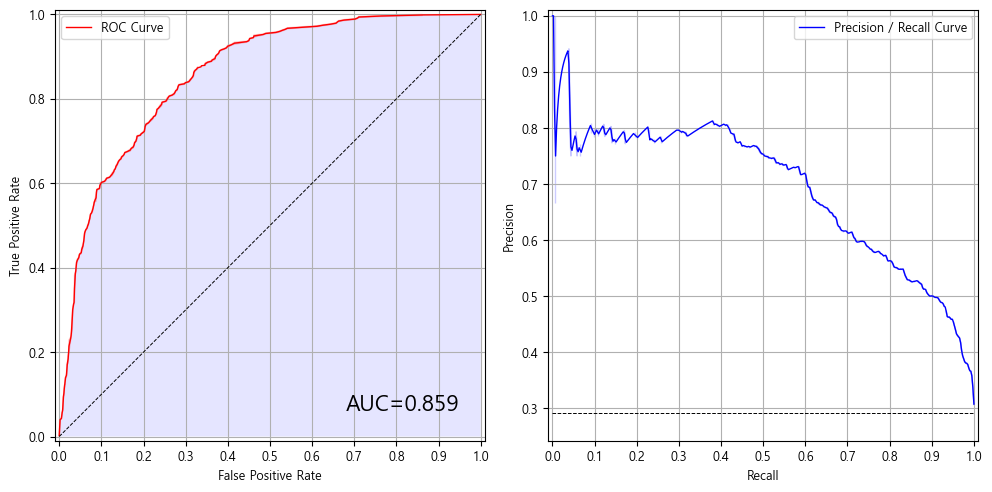


[학습곡선]


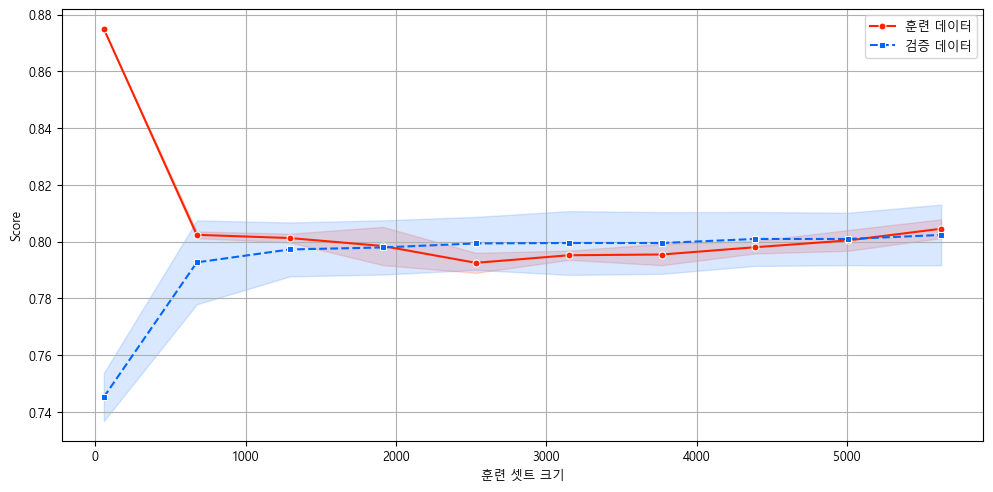

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
| 18 | Churn      | TotalCharges     |             0.3153 |      0.346 |  0.9125 |      0.362 | 10.6293 |     1.3707 |
|  4 | Churn      | tenure           |            -1.0465 |      0.326 | -3.2089 |      0.001 | 7.42235 |     0.3512 |
| 17 | Churn      | MonthlyCharges   |             0.7322 |      0.149 |  4.9221 |          0 | 5.13272 |     2.0797 |
| 14 | Churn      | Contract         |            -0.5798 |      0.143 |   -4.05 |          0 | 2.54988 |       0.56 |
|  7 | Churn      | InternetService  |             0.1191 |      0.109 |  1.0977 |      0.272 | 2.00185 |     1.1265 |
|  5 | Churn      | PhoneService     |            -0.2653 |      0.098

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [ ]:
my_logistic_classification(x_train, y_train, x_test, y_test)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.801422 |
| 10 |     1 | l2        |          0.801244 |
| 13 |    10 | l2        |          0.801067 |
| 16 |   100 | l2        |          0.801067 |
|  4 |  0.01 | l2        |          0.799111 |
|  1 | 0.001 | l2        |          0.768356 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |      0.27022 |     0.303395 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.804622 |     0.810235 | 예측 결과(TN,FP,TP,TN)가 실제 결과

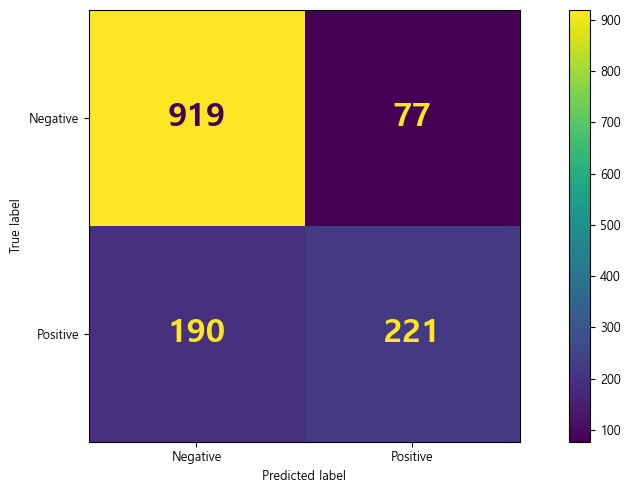


[ROC/PR Curve]


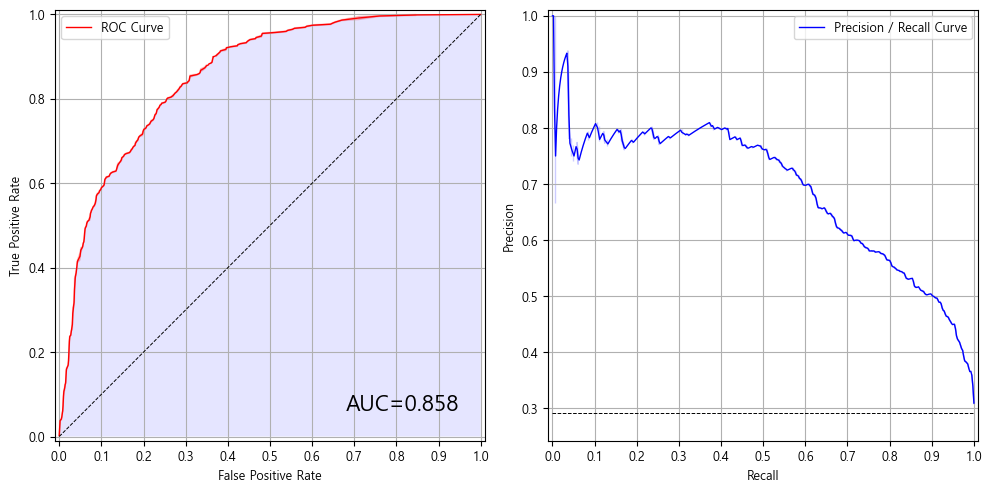


[학습곡선]


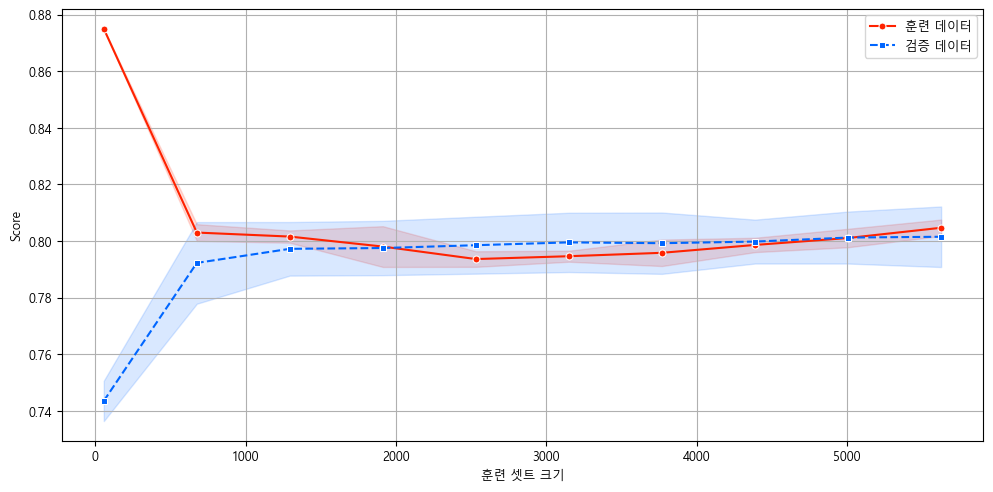

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
|  4 | Churn      | tenure           |            -0.7884 |      0.135 | -5.8413 |          0 | 3.01048 |     0.4546 |
| 17 | Churn      | MonthlyCharges   |              0.805 |      0.126 |  6.3726 |          0 |   2.866 |     2.2368 |
| 14 | Churn      | Contract         |             -0.574 |      0.143 | -4.0186 |          0 | 2.52903 |     0.5633 |
|  7 | Churn      | InternetService  |             0.1248 |      0.108 |  1.1588 |      0.247 | 1.99927 |     1.1329 |
|  5 | Churn      | PhoneService     |            -0.2599 |      0.097 |  -2.681 |      0.007 | 1.67418 |     0.7711 |
| 12 | Churn      | StreamingTV      |             0.0128 |      0.083

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [ ]:
# VIF, 유의확률 고려해서 변수 제거 전처리

ignore = ['TotalCharges']
x_tr = x_train.drop(ignore,axis=1)
x_te = x_test.drop(ignore,axis=1)
my_logistic_classification(x_tr, y_train, x_te, y_test)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.800889 |
| 13 |    10 | l2        |          0.800711 |
| 16 |   100 | l2        |          0.800711 |
|  7 |   0.1 | l2        |          0.800178 |
|  4 |  0.01 | l2        |            0.7984 |
|  1 | 0.001 | l2        |          0.767289 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.270316 |     0.303954 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.803378 |     0.810235 | 예측 결과(TN,FP,TP,TN)가 실제 결과

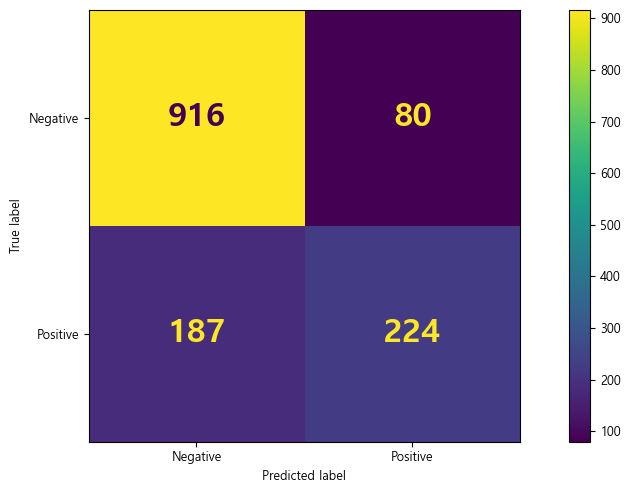


[ROC/PR Curve]


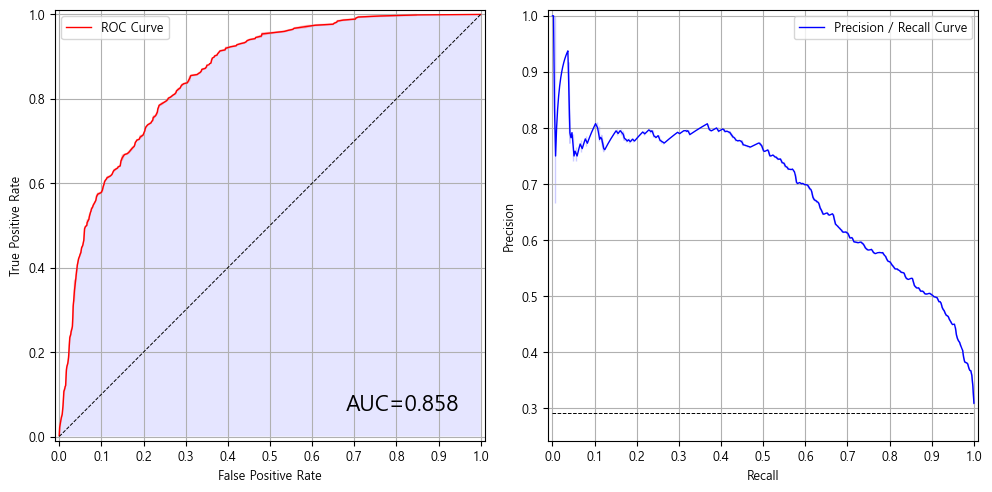


[학습곡선]


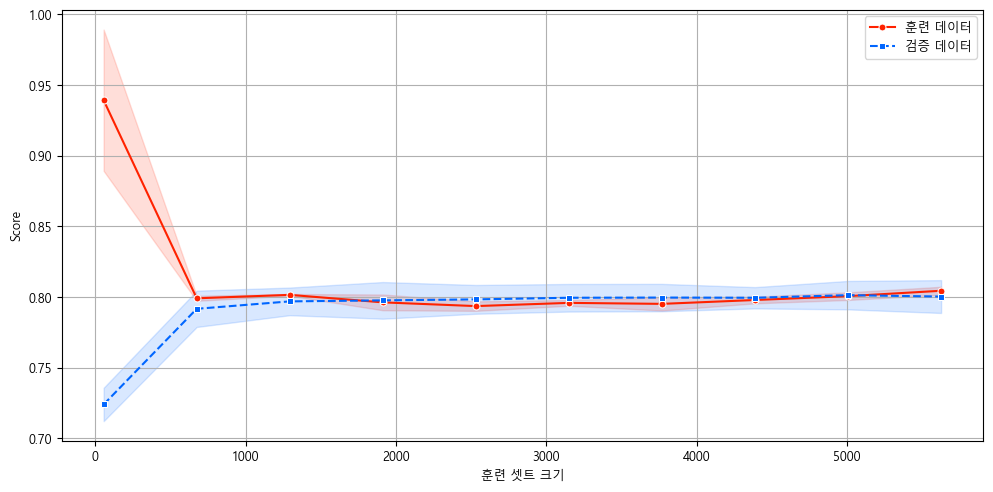

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
|  4 | Churn      | tenure           |            -0.8139 |      0.136 | -5.9944 |          0 | 3.01014 |     0.4431 |
| 16 | Churn      | MonthlyCharges   |             0.8399 |      0.123 |  6.8293 |          0 | 2.65932 |      2.316 |
| 13 | Churn      | Contract         |            -0.5805 |      0.144 | -4.0432 |          0 | 2.50132 |     0.5596 |
|  7 | Churn      | InternetService  |             0.1354 |      0.107 |  1.2685 |      0.205 | 1.91403 |      1.145 |
|  5 | Churn      | PhoneService     |            -0.2781 |      0.095 | -2.9142 |      0.004 | 1.62489 |     0.7572 |
|  2 | Churn      | Partner          |            -0.0052 |      0.088

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [ ]:
ignore = ['TotalCharges','StreamingMovies']
x_tr = x_train.drop(ignore,axis=1)
x_te = x_test.drop(ignore,axis=1)
my_logistic_classification(x_tr, y_train, x_te, y_test)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.800889 |
| 10 |     1 | l2        |          0.800889 |
| 13 |    10 | l2        |          0.800889 |
| 16 |   100 | l2        |          0.800889 |
|  4 |  0.01 | l2        |               0.8 |
|  1 | 0.001 | l2        |          0.767644 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |      0.27022 |     0.303465 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.804267 |     0.812367 | 예측 결과(TN,FP,TP,TN)가 실제 결과

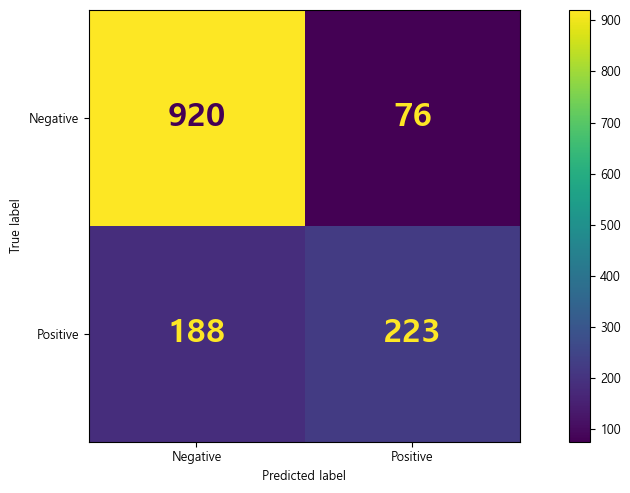


[ROC/PR Curve]


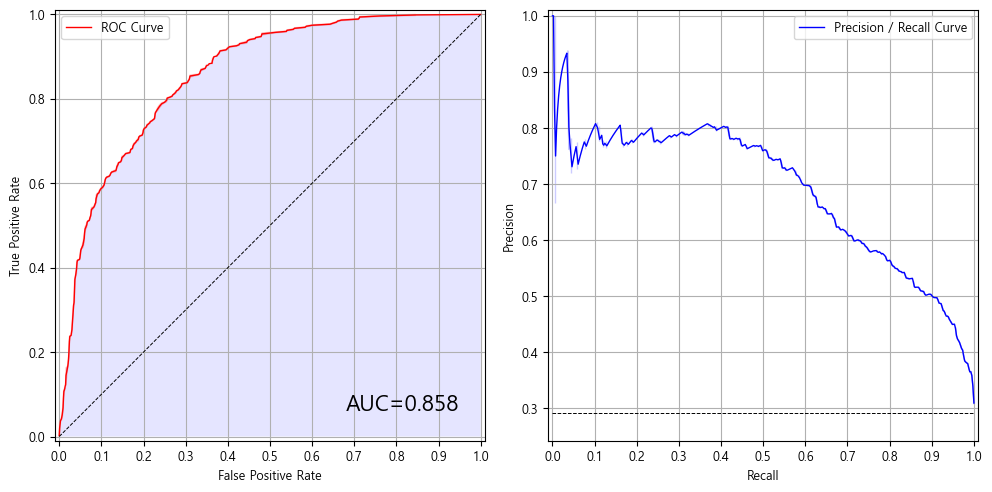


[학습곡선]


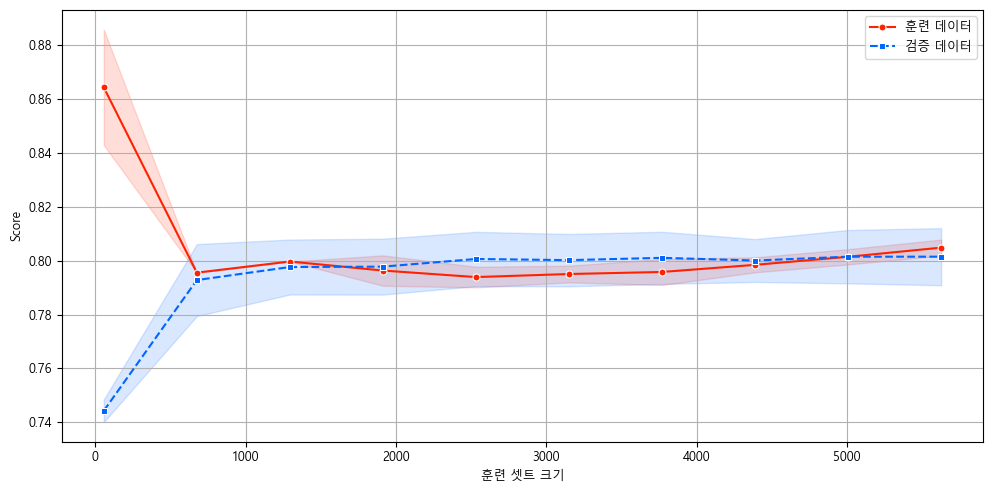

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
|  3 | Churn      | tenure           |            -0.7903 |      0.129 | -6.1155 |          0 | 2.78458 |     0.4537 |
| 15 | Churn      | MonthlyCharges   |             0.8049 |      0.122 |  6.5929 |          0 | 2.65738 |     2.2365 |
| 12 | Churn      | Contract         |             -0.574 |      0.142 | -4.0376 |          0 | 2.49219 |     0.5633 |
|  6 | Churn      | InternetService  |              0.125 |      0.106 |  1.1814 |      0.237 | 1.91109 |     1.1332 |
|  4 | Churn      | PhoneService     |            -0.2601 |      0.095 | -2.7389 |      0.006 | 1.62294 |      0.771 |
|  5 | Churn      | MultipleLines    |             0.0846 |      0.088

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [ ]:
ignore = ['TotalCharges','StreamingMovies','Partner']
x_tr = x_train.drop(ignore,axis=1)
x_te = x_test.drop(ignore,axis=1)
my_logistic_classification(x_tr, y_train, x_te, y_test)

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.802133 |
| 13 |    10 | l2        |          0.802133 |
| 16 |   100 | l2        |          0.802133 |
|  7 |   0.1 | l2        |          0.801422 |
|  4 |  0.01 | l2        |          0.801244 |
|  1 | 0.001 | l2        |          0.769244 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.270308 |     0.303986 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.804089 |     0.812367 | 예측 결과(TN,FP,TP,TN)가 실제 결과

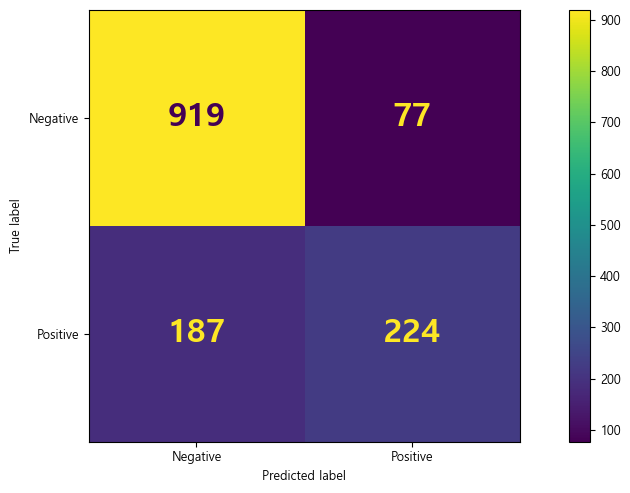


[ROC/PR Curve]


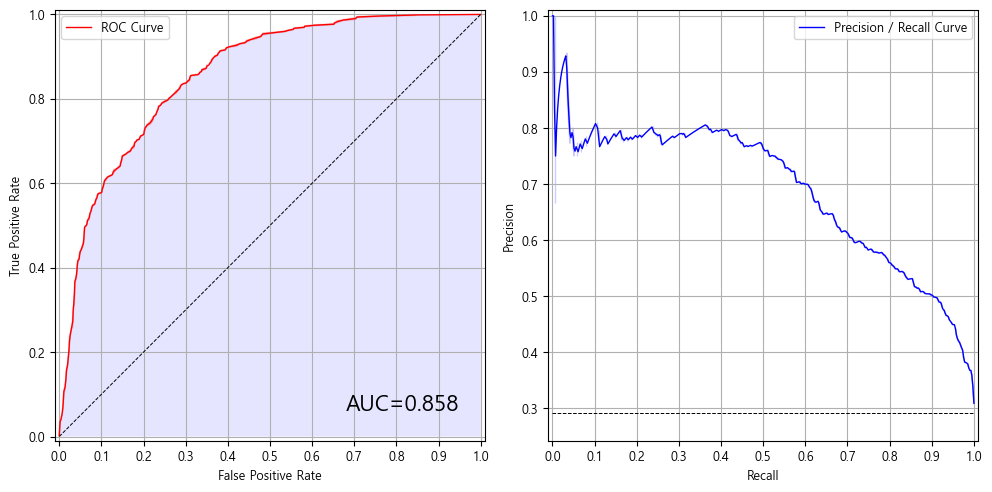


[학습곡선]


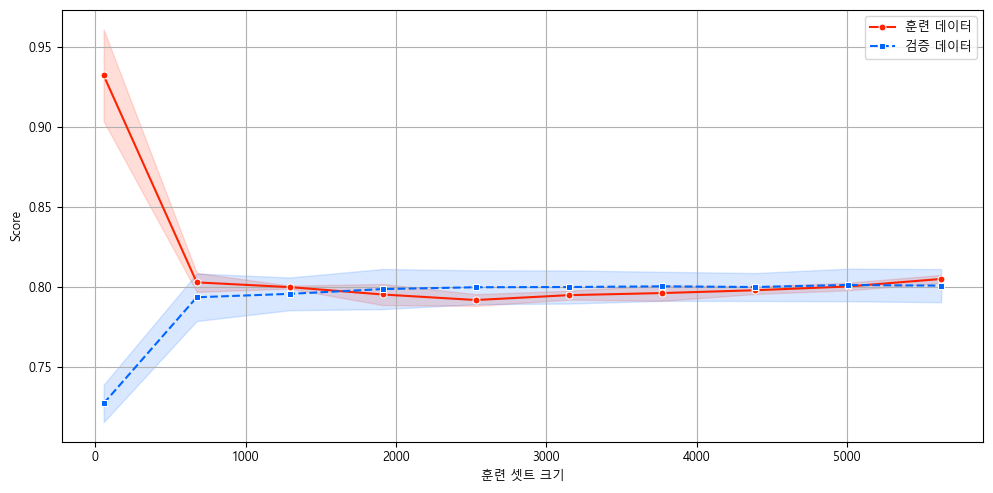

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
|  3 | Churn      | tenure           |            -0.8143 |       0.13 | -6.2806 |          0 | 2.77632 |     0.4429 |
| 11 | Churn      | Contract         |            -0.5793 |      0.143 | -4.0599 |          0 | 2.47499 |     0.5603 |
| 14 | Churn      | MonthlyCharges   |             0.8441 |      0.116 |  7.2701 |          0 | 2.28876 |     2.3259 |
|  6 | Churn      | InternetService  |             0.1376 |      0.103 |  1.3305 |      0.183 | 1.73173 |     1.1476 |
|  4 | Churn      | PhoneService     |              -0.28 |      0.093 | -2.9977 |      0.003 | 1.57277 |     0.7558 |
|  5 | Churn      | MultipleLines    |             0.0819 |      0.088

LogisticRegression(C=1, max_iter=500, n_jobs=-1)

In [ ]:
ignore = ['TotalCharges','StreamingMovies','Partner','StreamingTV']
x_tr_high = x_train.drop(ignore,axis=1)
x_te_high = x_test.drop(ignore,axis=1)
my_logistic_classification(x_tr_high, y_train, x_te_high, y_test)

In [ ]:
# 데이터 불균형 해소

#### (1) RandomUnderSampler

In [ ]:
origin['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=777)
x_under, y_under = undersampler.fit_resample(x_train, y_train)
y_under.value_counts()

0    1458
1    1458
Name: Churn, dtype: int64

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.764059 |
| 10 |     1 | l2        |          0.763373 |
| 13 |    10 | l2        |          0.762688 |
| 16 |   100 | l2        |          0.762688 |
|  4 |  0.01 | l2        |          0.758569 |
|  1 | 0.001 | l2        |          0.753077 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.293457 |     0.218919 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |      0.76749 |      0.75764 | 예측 결과(TN,FP,TP,TN)가 실제 결과

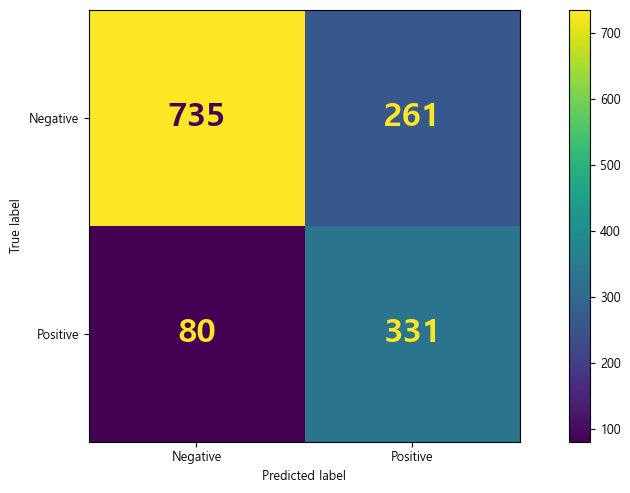


[ROC/PR Curve]


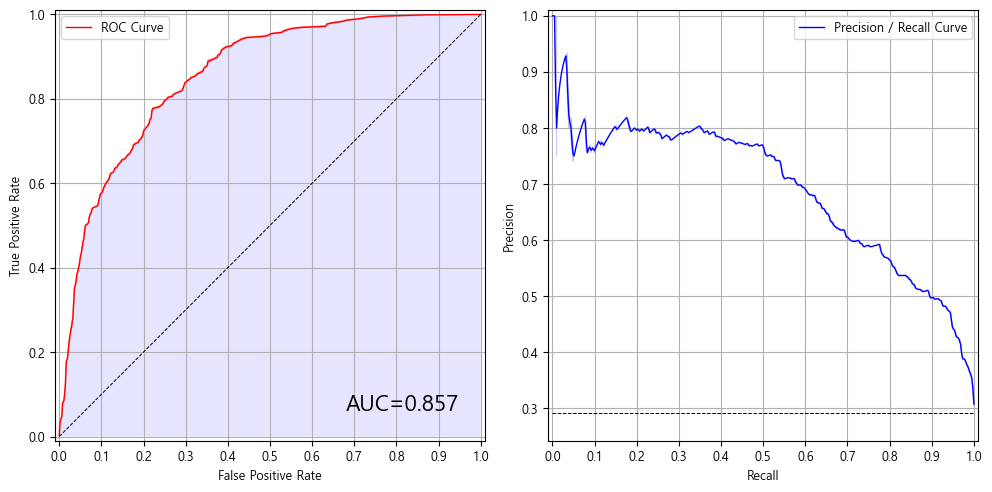


[학습곡선]


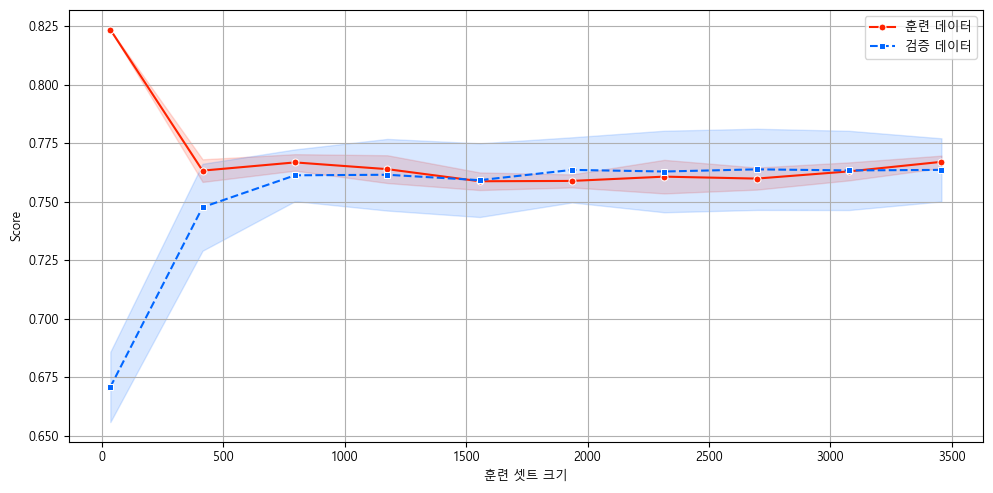

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
| 18 | Churn      | TotalCharges     |              0.219 |      0.273 |  0.8028 |      0.422 | 10.6293 |     1.2448 |
|  4 | Churn      | tenure           |            -0.8692 |      0.243 | -3.5798 |          0 | 7.42235 |     0.4193 |
| 17 | Churn      | MonthlyCharges   |             0.8131 |      0.143 |  5.6878 |          0 | 5.13272 |     2.2549 |
| 14 | Churn      | Contract         |            -0.6033 |      0.111 | -5.4174 |          0 | 2.54988 |      0.547 |
|  7 | Churn      | InternetService  |             0.1616 |      0.094 |  1.7271 |      0.084 | 2.00185 |     1.1754 |
|  5 | Churn      | PhoneService     |            -0.2428 |      0.087

LogisticRegression(C=0.1, max_iter=500, n_jobs=-1)

In [ ]:
my_logistic_classification(x_under, y_under, x_test, y_test)

#### (2) RandomOverSampler

In [ ]:
oversampler = RandomOverSampler(sampling_strategy='minority', random_state=777)
x_over, y_over = oversampler.fit_resample(x_train, y_train)
y_over.value_counts()

1    4167
0    4167
Name: Churn, dtype: int64

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
|  7 |   0.1 | l2        |          0.767939 |
| 10 |     1 | l2        |          0.766379 |
| 16 |   100 | l2        |          0.766139 |
| 13 |    10 | l2        |          0.766019 |
|  4 |  0.01 | l2        |          0.764699 |
|  1 | 0.001 | l2        |          0.758939 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.301275 |      0.22602 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.766739 |     0.753376 | 예측 결과(TN,FP,TP,TN)가 실제 결과

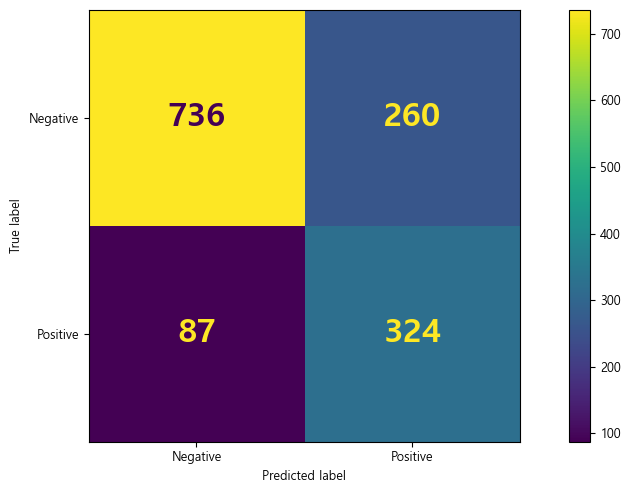


[ROC/PR Curve]


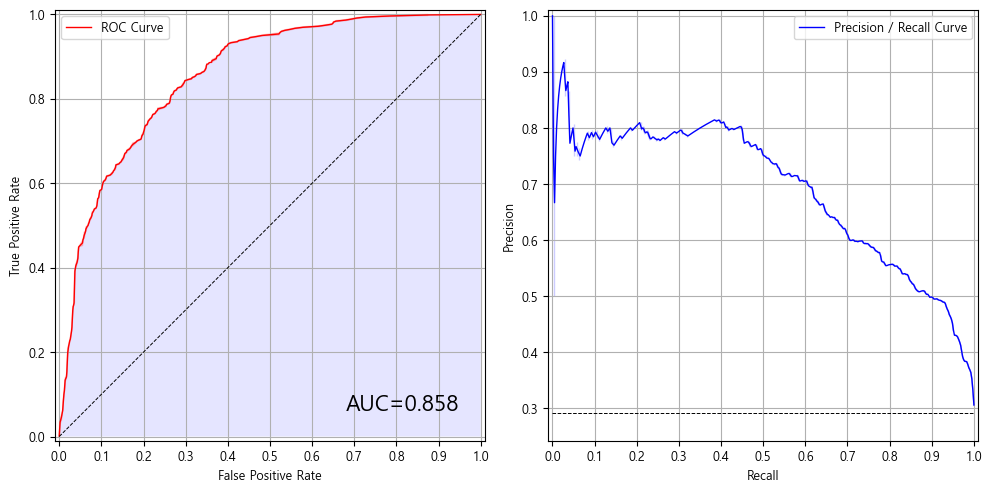


[학습곡선]


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
my_logistic_classification(x_over, y_over, x_test, y_test, report=False)

#### (3) SMOTE

In [ ]:
smote_sampler = SMOTE(sampling_strategy='minority', k_neighbors=3, random_state=777)
x_sm, y_sm = smote_sampler.fit_resample(x_train, y_train)
y_sm.value_counts()

1    4167
0    4167
Name: Churn, dtype: int64

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 10 |     1 | l2        |          0.769979 |
| 13 |    10 | l2        |          0.769859 |
| 16 |   100 | l2        |          0.769859 |
|  7 |   0.1 | l2        |          0.769499 |
|  4 |  0.01 | l2        |          0.769379 |
|  1 | 0.001 | l2        |          0.763139 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.311533 |     0.234241 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.771178 |     0.759773 | 예측 결과(TN,FP,TP,TN)가 실제 결과

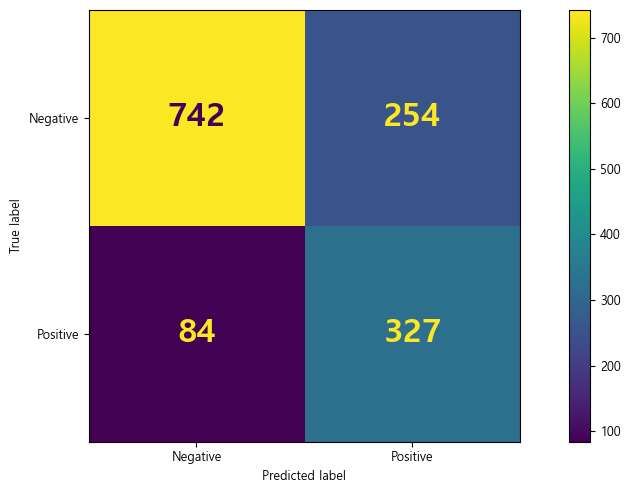


[ROC/PR Curve]


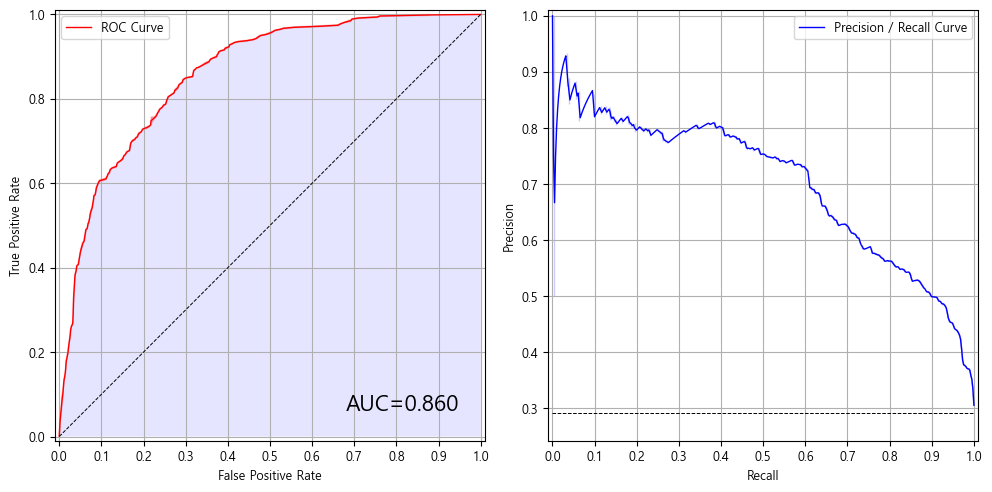


[학습곡선]


TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
my_logistic_classification(x_sm, y_sm, x_test, y_test)

In [ ]:
# stratify 옵션 설정
x = df2.drop('Churn',axis=1)
y = df2['Churn']
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, stratify=df2['Churn'], random_state=2024)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5625, 19), (5625,), (1407, 19), (1407,))

[교차검증]
+----+-------+-----------+-------------------+
|    |     C | penalty   |   mean_test_score |
|----+-------+-----------+-------------------|
| 13 |    10 | l2        |          0.802311 |
| 16 |   100 | l2        |          0.800356 |
| 10 |     1 | l2        |          0.799644 |
|  7 |   0.1 | l2        |          0.799289 |
|  4 |  0.01 | l2        |          0.797333 |
|  1 | 0.001 | l2        |          0.793067 |
+----+-------+-----------+-------------------+

[분류분석 성능평가]
+-------------------------+--------------+--------------+-----------------------------------------------------------+
|                         |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------------+--------------+--------------+-----------------------------------------------------------|
| 의사결정계수(Pseudo R2) |     0.275256 |     0.300292 | 로지스틱회귀의 성능 측정 지표로, 1에 가까울수록 좋은 모델 |
| 정확도(Accuracy)        |     0.804622 |     0.800995 | 예측 결과(TN,FP,TP,TN)가 실제 결과

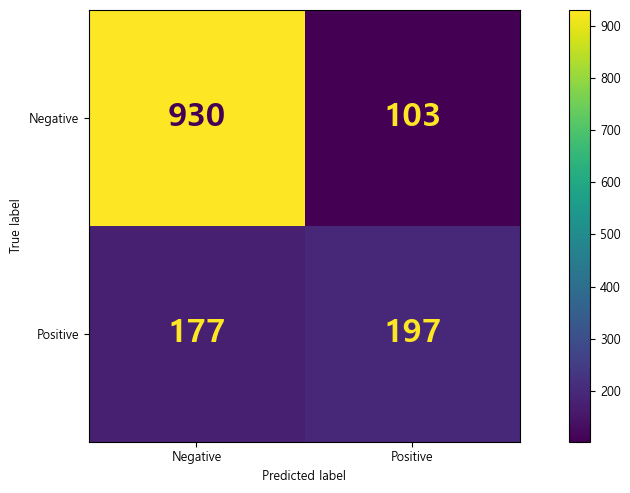


[ROC/PR Curve]


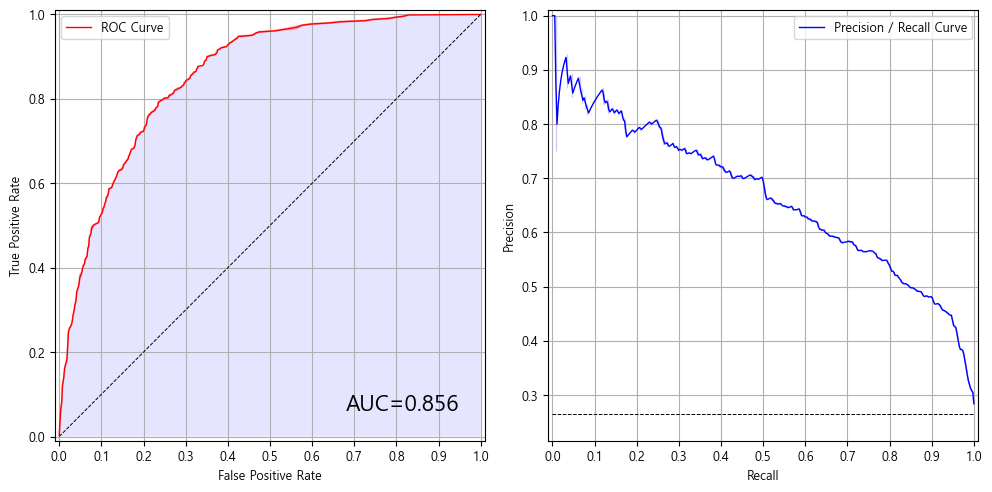


[학습곡선]


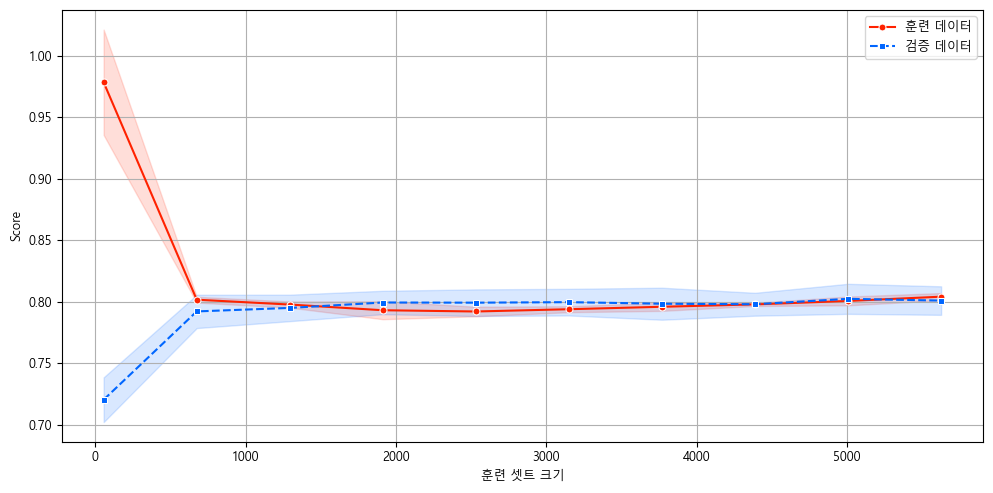

+----+------------+------------------+--------------------+------------+---------+------------+---------+------------+
|    | 종속변수   | 독립변수         |   B(비표준화 계수) |   표준오차 |       t |   유의확률 |     VIF |   OddsRate |
|----+------------+------------------+--------------------+------------+---------+------------+---------+------------|
| 17 | Churn      | MonthlyCharges   |             0.0216 |      0.005 |  4.3912 |          0 | 21.1728 |     1.0218 |
|  4 | Churn      | tenure           |            -0.0564 |      0.014 | -4.0136 |          0 | 15.7071 |     0.9452 |
|  5 | Churn      | PhoneService     |            -0.9507 |      0.342 |  -2.781 |      0.005 | 15.3024 |     0.3865 |
| 18 | Churn      | TotalCharges     |             0.0003 |          0 |  1.8498 |      0.064 | 14.4417 |     1.0003 |
| 14 | Churn      | Contract         |              -0.76 |      0.171 | -4.4432 |          0 | 4.30841 |     0.4677 |
|  7 | Churn      | InternetService  |             0.1698 |      0.144

LogisticRegression(C=10, max_iter=500, n_jobs=-1)

In [ ]:
my_logistic_classification(x_train, y_train, x_test, y_test)